In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# Step 1: Load the Dataset
file_path = 'C:/Users/Admin/OneDrive/Desktop/Data Science/creditcard - Capstone.csv'
data = pd.read_csv(file_path)

In [3]:
# Step 2: Exploratory Data Analysis (EDA)
# Check the class distribution
print("Class Distribution:\n", data['Class'].value_counts())
fraud_percentage = data['Class'].value_counts()[1] / data['Class'].value_counts().sum() * 100
print(f"\nFraudulent Transactions: {fraud_percentage:.4f}%")

Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64

Fraudulent Transactions: 0.1727%


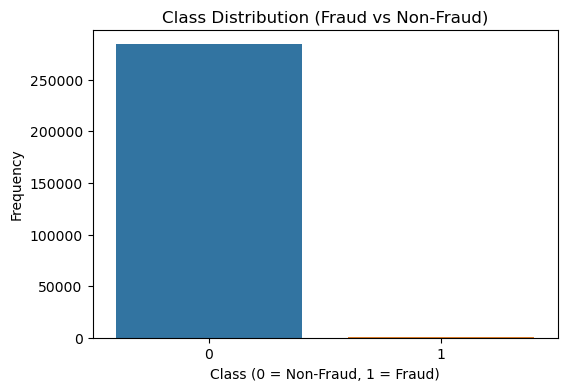

In [4]:
# Plot the class distribution
plt.figure(figsize=(6,4))
sns.barplot(x=data['Class'].value_counts().index, y=data['Class'].value_counts().values)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Frequency')
plt.show()

In [5]:
# Check basic statistics
print(data.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


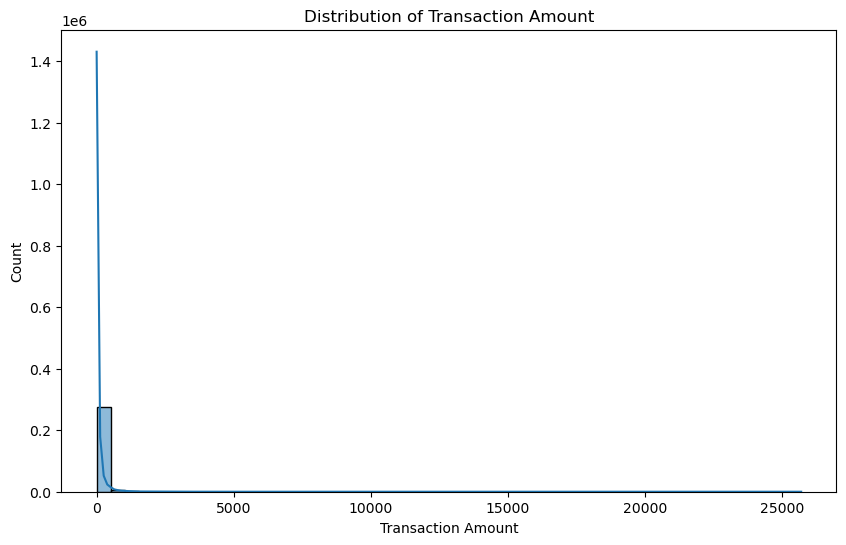

In [6]:
# Plot Transaction Amount and Time
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.show()

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


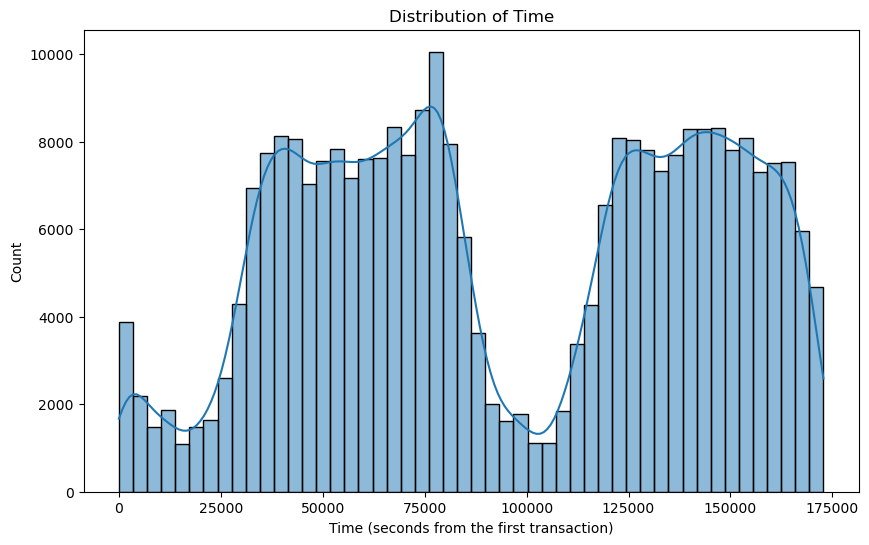

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Time'], bins=50, kde=True)
plt.title('Distribution of Time')
plt.xlabel('Time (seconds from the first transaction)')
plt.show()

In [7]:
# Step 3: Data Cleaning
# Scale 'Amount' feature and drop the original 'Amount' column
scaler = RobustScaler()
data['Amount_scaled'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data = data.drop(columns=['Amount'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Time           284807 non-null  float64
 1   V1             284807 non-null  float64
 2   V2             284807 non-null  float64
 3   V3             284807 non-null  float64
 4   V4             284807 non-null  float64
 5   V5             284807 non-null  float64
 6   V6             284807 non-null  float64
 7   V7             284807 non-null  float64
 8   V8             284807 non-null  float64
 9   V9             284807 non-null  float64
 10  V10            284807 non-null  float64
 11  V11            284807 non-null  float64
 12  V12            284807 non-null  float64
 13  V13            284807 non-null  float64
 14  V14            284807 non-null  float64
 15  V15            284807 non-null  float64
 16  V16            284807 non-null  float64
 17  V17            284807 non-nul

In [9]:
# No missing values as seen from .info(), so no imputation required

In [10]:
# Step 4: Balancing the Data using SMOTE
# Define the features and target variable
X = data.drop(columns=['Class'])
y = data['Class']

In [11]:
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [12]:
# Check class distribution after SMOTE
print("Class Distribution After SMOTE:\n", y_resampled.value_counts())

Class Distribution After SMOTE:
 Class
0    284315
1    284315
Name: count, dtype: int64


In [13]:
# Step 5: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [14]:
# Step 6: Model Selection and Training
# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

In [15]:
# Evaluate Logistic Regression
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98     56863
           1       0.98      0.97      0.98     56863

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726



In [16]:
# Model 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [17]:
# Evaluate Random Forest
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [18]:
# Model 3: Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

In [19]:
# Evaluate Gradient Boosting
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb)) 


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     56863
           1       0.99      0.98      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



In [20]:
# Step 7: Hyperparameter Tuning (Grid Search on Random Forest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid (reduce number of options)
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(2, 10)
}

# Use RandomizedSearchCV instead of GridSearchCV
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019C67532210>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019C11DE9F90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019C6758FC10>},
                   random_state=42, scoring='accuracy')

In [25]:
# Get the best model
best_rf_model = random_search_rf.best_estimator_

In [21]:
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

KeyboardInterrupt: 

In [26]:
# Evaluate Best Random Forest Model
y_pred_best_rf = best_rf_model.predict(X_test)
print("\nBest Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))


Best Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [27]:
# Step 8: Model Validation and ROC Curve
y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_rf)


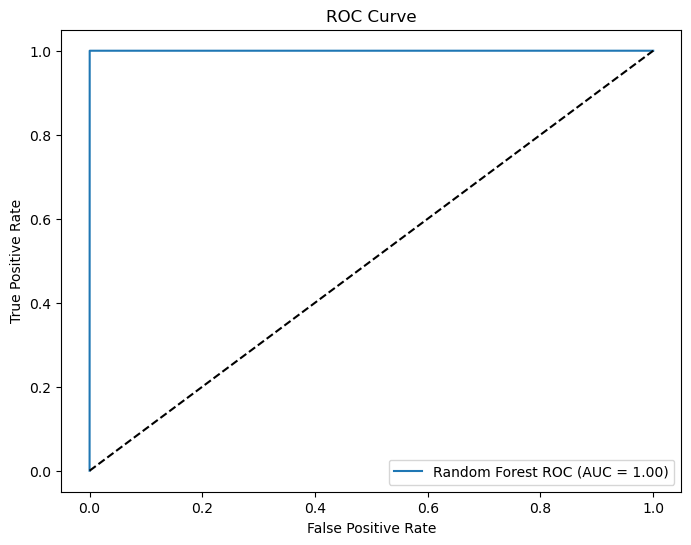

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Random Forest ROC (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
# Step 9: Model Deployment Plan
# For deployment, you can save the best model using joblib or pickle
import joblib
joblib.dump(best_rf_model, 'best_rf_model.pkl')


['best_rf_model.pkl']

In [30]:
print("Model saved as 'best_rf_model.pkl' for deployment.")


Model saved as 'best_rf_model.pkl' for deployment.
